In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/dataset.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier1.keras'

In [3]:
NUM_CLASSES = 7

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              77 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:

'''cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)'''

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    'model/keypoint_classifier/keypoint_classifier1.keras',  # Change the extension to .keras
    verbose=1,
    save_weights_only=False
)

# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [11]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1687 - loss: 2.0580
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1680 - loss: 2.0580 - val_accuracy: 0.1559 - val_loss: 1.9322
Epoch 2/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1094 - loss: 2.1032
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1382 - loss: 2.0217 - val_accuracy: 0.2281 - val_loss: 1.9008
Epoch 3/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1406 - loss: 1.9370
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1468 - loss: 1.9497 - val_accuracy: 0.3004 - val_loss: 1.8836
Epoch 4/100
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1649 - loss: 1.9340  
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier1.ke

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5091 - loss: 1.3614 - val_accuracy: 0.8441 - val_loss: 1.0049
Epoch 25/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5289 - loss: 1.3190 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5278 - loss: 1.3201 - val_accuracy: 0.8517 - val_loss: 0.9606
Epoch 26/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6406 - loss: 1.1790
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5280 - loss: 1.2891 - val_accuracy: 0.8479 - val_loss: 0.9238
Epoch 27/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5938 - loss: 1.2731
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5293 - loss: 1.3246 - val_accuracy: 0.8517 - val_loss: 0.9031
Epoch 28/100
 1/13 ━━━━━━━━━━━━━━━━━━━

Epoch 48/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6562 - loss: 1.0345
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6546 - loss: 0.9750 - val_accuracy: 0.8973 - val_loss: 0.5018
Epoch 49/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6094 - loss: 1.0837
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6309 - loss: 1.0025 - val_accuracy: 0.9011 - val_loss: 0.5003
Epoch 50/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6562 - loss: 0.8399
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6274 - loss: 0.9705 - val_accuracy: 0.8821 - val_loss: 0.4974
Epoch 51/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6406 - loss: 0.8964
Epoch 51: saving model to model/keypoint_classifier/keypoint_classi

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7019 - loss: 0.8341 - val_accuracy: 0.9163 - val_loss: 0.3824
Epoch 72/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7344 - loss: 0.7323
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7360 - loss: 0.7585 - val_accuracy: 0.9278 - val_loss: 0.3713
Epoch 73/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6875 - loss: 0.8443
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6878 - loss: 0.8620 - val_accuracy: 0.9278 - val_loss: 0.3678
Epoch 74/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6875 - loss: 0.8436
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7026 - loss: 0.8202 - val_accuracy: 0.9163 - val_loss: 0.3598
Epoch 75/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 95/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8125 - loss: 0.6249
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7325 - loss: 0.7399 - val_accuracy: 0.9354 - val_loss: 0.3101
Epoch 96/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7344 - loss: 0.7690
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7354 - loss: 0.7688 - val_accuracy: 0.9392 - val_loss: 0.3092
Epoch 97/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.7500 - loss: 0.6303
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier1.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7156 - loss: 0.7590 - val_accuracy: 0.9392 - val_loss: 0.3099
Epoch 98/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7344 - loss: 0.6871
Epoch 98: saving model to model/keypoint_classifier/keypoint_class

In [14]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9267 - loss: 0.3188  


In [15]:

model = tf.keras.models.load_model(model_save_path)

In [16]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[1.7588129e-04 1.2537341e-01 6.7782426e-01 1.3085459e-01 1.3998668e-02
 4.6048872e-03 4.7168288e-02]
2


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


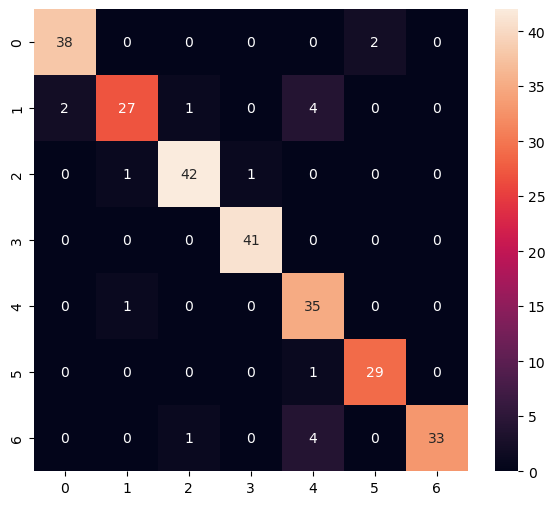

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.93      0.79      0.86        34
           2       0.95      0.95      0.95        44
           3       0.98      1.00      0.99        41
           4       0.80      0.97      0.88        36
           5       0.94      0.97      0.95        30
           6       1.00      0.87      0.93        38

    accuracy                           0.93       263
   macro avg       0.93      0.93      0.93       263
weighted avg       0.94      0.93      0.93       263



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [18]:
model.save(model_save_path, include_optimizer=False)

In [ ]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier1.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpph369hlc\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpph369hlc\assets


In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 997 μs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8854864e-01 1.0580237e-02 8.7004591e-04 1.2242134e-07 9.1468081e-07]
0
